# David Williams
# Project 2 - Data 201

The dataset comes from the Department of Education (DOE).  The dataset contain 2,463 rows and 49 columns.  The data contains information about college and universities for 2000 and 2013. This project will use linear regression to determine factors that affect the graduation rate.

The variables used in this project: tier, type, sticker_price_2013 (tuition cost), sat_avg_2013, grad_rate_150_p_2013

tier
Selectivity and type combination (defined above):
1 = Ivy Plus
2 = Other elite schools (public and private)
3 = Highly selective public
4 = Highly selective private
5 = Selective public
6 = Selective private
7 = Nonselective 4-year public
8 = Nonselective 4-year private not-for-profit
9 = Two-year (public and private not-for-profit)
10 = Four-year for-profit
11 = Two-year for-profit
12 = Less than two year schools of any type
13 = Attending college with insufficient data

type
1 = public
2 = private non-profit
3 = for-profit

sticker_price_2013
Average Annual Cost of Attendance (Tuition + Fees) in [YEAR] = 2000, 2013

sat_avg_2013
Average SAT scores (scaled to 1600) in [YEAR] = 2001, 2013, defined as the mean of the 25th and 75th percentile of math+verbal SAT scores. Missing for institutions that do not require SAT.

grad_rate_150_p_2013
Percentage of students graduating within 150 percent of normal time at four-year and two-year institutions in [YEAR] = 2002, 2013



In [64]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats
from scipy import stats  

In [65]:
scoreboard = pd.read_csv("c:/Users/dwilliams/documents/montgomery/data 201/college_scoreboard.csv")

In [66]:
print(type(scoreboard))

<class 'pandas.core.frame.DataFrame'>


In [70]:
scoreboard.head(3)

,super_opeid,name,region,state,fips,cz,czname,cfips,county,zip,...,hisp_share_fall_2000,alien_share_fall_2000,pct_arthuman_2000,pct_business_2000,pct_health_2000,pct_multidisci_2000,pct_publicsocial_2000,pct_stem_2000,pct_socialscience_2000,pct_tradepersonal_2000
0,30955,ASA Institute Of Business & Computer Technology,1,NY,36,19400,New York,36047,Kings,11201,...,0.073324,0.071229,0.000000,6.603774,11.425576,0.000000,0.000000,81.970650,0.000000,0.000000
1,3537,Abilene Christian University,3,TX,48,32501,Abilene,48441,Taylor,79699,...,0.056724,0.039943,10.785619,22.503330,5.059920,9.720373,8.788282,11.318242,31.691078,0.133156
2,1541,Abraham Baldwin Agricultural College,3,GA,13,8503,Valdosta,13277,Tift,31793,...,0.016730,0.013688,0.000000,4.100228,12.072893,47.152618,6.378132,29.612757,0.000000,0.683371


In [67]:
scoreboard.shape

(2463, 49)

In [68]:
scoreboard.ndim

2

In [71]:
scoreboard.head(3)

,super_opeid,name,region,state,fips,cz,czname,cfips,county,zip,...,hisp_share_fall_2000,alien_share_fall_2000,pct_arthuman_2000,pct_business_2000,pct_health_2000,pct_multidisci_2000,pct_publicsocial_2000,pct_stem_2000,pct_socialscience_2000,pct_tradepersonal_2000
0,30955,ASA Institute Of Business & Computer Technology,1,NY,36,19400,New York,36047,Kings,11201,...,0.073324,0.071229,0.000000,6.603774,11.425576,0.000000,0.000000,81.970650,0.000000,0.000000
1,3537,Abilene Christian University,3,TX,48,32501,Abilene,48441,Taylor,79699,...,0.056724,0.039943,10.785619,22.503330,5.059920,9.720373,8.788282,11.318242,31.691078,0.133156
2,1541,Abraham Baldwin Agricultural College,3,GA,13,8503,Valdosta,13277,Tift,31793,...,0.016730,0.013688,0.000000,4.100228,12.072893,47.152618,6.378132,29.612757,0.000000,0.683371


In [72]:
scoreboard.dtypes

super_opeid                           int64
name                                 object
region                                int64
state                                object
fips                                  int64
cz                                    int64
czname                               object
cfips                                 int64
county                               object
zip                                   int64
tier                                  int64
tier_name                            object
type                                  int64
iclevel                               int64
public                                int64
barrons                               int64
exp_instr_pc_2000                   float64
exp_instr_pc_2013                   float64
multi                                 int64
hbcu                                  int64
flagship                              int64
ipeds_enrollment_2013                 int64
ipeds_enrollment_2000           

In [73]:
# Remove columns not used

scoreboard = scoreboard.drop(columns=["super_opeid","name","region","state",
                         "fips","cz","czname","cfips","county",
                         "zip","tier_name","public","barrons",
                         "exp_instr_pc_2000","exp_instr_pc_2013",
                         "iclevel","multi","hbcu","flagship",
                         "ipeds_enrollment_2013","ipeds_enrollment_2000",
                         "sticker_price_2000","grad_rate_150_p_2002",
                         "avgfacsal_2013","avgfacsal_2001","sat_avg_2001",
                         "scorecard_netprice_2013","scorecard_rej_rate_2013",
                         "scorecard_median_earnings_2011","endowment_pc_2000",
                         "exp_instr_2012","exp_instr_2000","asian_or_pacific_share_fall_2000",
                         "black_share_fall_2000","hisp_share_fall_2000","alien_share_fall_2000",
                         "pct_arthuman_2000","pct_business_2000","pct_health_2000","pct_multidisci_2000",
                         "pct_publicsocial_2000","pct_stem_2000","pct_socialscience_2000","pct_tradepersonal_2000"
                         ],axis=0)

In [74]:
scoreboard.head(3)


,tier,type,sticker_price_2013,grad_rate_150_p_2013,sat_avg_2013
0,11,3,12298.0,0.316261,NaN
1,6,2,29450.0,0.565611,1075.0
2,7,1,3394.0,NaN,925.0


In [75]:
# remove all columns with NaN

scoreboard = scoreboard.dropna()

In [76]:
# Reorder the columns

scoreboard_reorder = scoreboard[["tier","type","sticker_price_2013","sat_avg_2013","grad_rate_150_p_2013"]]

In [77]:
scoreboard_reorder

,tier,type,sticker_price_2013,sat_avg_2013,grad_rate_150_p_2013
1,6,2,29450.0000,1075.0000,0.565611
4,5,1,8014.0000,984.0000,0.261176
5,6,2,32340.0000,1115.0000,0.625142
7,6,2,32660.0000,990.0000,0.544513
10,8,2,12430.0000,925.0000,0.333333
14,5,1,9096.0000,843.5000,0.291383
16,5,1,8720.0000,855.0000,0.251665
19,8,2,30131.0000,1165.0000,0.723485
20,5,1,5192.0000,880.0000,0.424920
23,6,2,37300.0000,1130.0000,0.736000


In [78]:
# separate the independent variables and dependent variables
# The independent variables are:tier, type, sticker_price_2013, sat_avg_2013 (X)
# The dependent variable is: grad_rate_150_p_2013 (y)

X = scoreboard_reorder.iloc[:, :-1].values
y = scoreboard_reorder.iloc[:,4].values


In [79]:
import sklearn as scikit_learn

In [80]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

In [81]:
# 80% was used for training 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [82]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression

In [83]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)

In [25]:
# array predict

y_pred

array([0.48542355, 0.48603902, 0.5748622 , 0.59348033, 0.5015817 ,
       0.67672167, 0.32128721, 0.59636944, 0.57418056, 0.60654211,
       0.62415282, 0.67004356, 0.48841787, 0.87592657, 0.6126121 ,
       0.43708863, 0.48749434, 0.35042984, 0.56099949, 0.55828998,
       0.66514644, 0.35495076, 0.59752916, 0.61154048, 0.51921306,
       0.53654236, 0.597861  , 0.58652777, 0.55026214, 0.59731074,
       0.43269146, 0.46259641, 0.44392339, 0.98263596, 0.45045309,
       0.99345726, 0.40832239, 0.55733734, 0.56142878, 0.4989393 ,
       0.51030424, 0.51002655, 0.53751484, 0.33212115, 0.46723311,
       0.44331066, 0.51367934, 0.52128999, 0.57598146, 0.5629494 ,
       0.43412838, 0.34126564, 0.49743333, 0.56136726, 0.46673513,
       0.57998899, 0.36340427, 0.42781288, 0.65043   , 0.52309749,
       0.50927342, 0.55484795, 0.65172494, 0.52013587, 0.52461995,
       0.52214773, 0.54341225, 0.30915463, 0.67746539, 0.66243916,
       0.65356559, 0.45680318, 0.43906584, 0.64328957, 0.46002

In [86]:
y_test

array([0.50705394, 0.50552923, 0.61176471, 0.44028951, 0.25968586,
       0.81327129, 0.10869565, 0.62130177, 0.64675325, 0.57309941,
       0.67923169, 0.75822368, 0.37897574, 0.78612717, 0.69621444,
       0.41460055, 0.41232228, 0.31538461, 0.7146402 , 0.66375199,
       0.6795995 , 0.36520489, 0.60647829, 0.52272727, 0.50409165,
       0.40425532, 0.69746914, 0.65757576, 0.5       , 0.64171123,
       0.44444444, 0.30830671, 0.56043956, 0.94188984, 0.47953216,
       0.97791318, 0.296875  , 0.50462351, 0.50843373, 0.60652009,
       0.44161233, 0.63088512, 0.51609907, 0.34782609, 0.37857143,
       0.52173913, 0.55428571, 0.65483668, 0.47142857, 0.55      ,
       0.47906977, 0.2439759 , 0.51173896, 0.39150943, 0.58503401,
       0.56557377, 0.32150538, 0.40536913, 0.80408238, 0.57103064,
       0.56300268, 0.60642919, 0.7004717 , 0.5139785 , 0.51990067,
       0.42727273, 0.56842105, 0.16049383, 0.70080862, 0.68515206,
       0.75625579, 0.44825475, 0.39240506, 0.68187579, 0.27560

In [87]:
# mean square error

np.mean((y_test - y_pred)**2)

0.007715815323295074

In [88]:
# Determine Residual

resid = y_test - y_pred

In [89]:
# Put in Series array

resid=pd.Series(resid)

In [90]:
print(resid)

0      0.021630
1      0.019490
2      0.036903
3     -0.153191
4     -0.241896
5      0.136550
6     -0.212592
7      0.024932
8      0.072573
9     -0.033443
10     0.055079
11     0.088180
12    -0.109442
13    -0.089799
14     0.083602
15    -0.022488
16    -0.075172
17    -0.035045
18     0.153641
19     0.105462
20     0.014453
21     0.010254
22     0.008949
23    -0.088813
24    -0.015121
25    -0.132287
26     0.099608
27     0.071048
28    -0.050262
29     0.044400
         ...   
164   -0.087750
165    0.166830
166    0.104798
167    0.083113
168   -0.003882
169    0.028870
170   -0.056051
171   -0.007792
172   -0.024992
173    0.002389
174   -0.091601
175   -0.005049
176    0.058426
177    0.124455
178   -0.070953
179   -0.072990
180   -0.101515
181   -0.090627
182    0.133087
183    0.043447
184    0.041440
185   -0.060592
186    0.101080
187    0.027926
188    0.154365
189    0.042908
190    0.020750
191   -0.008364
192    0.106037
193   -0.032243
Length: 194, dtype: floa

In [91]:
import seaborn as sns

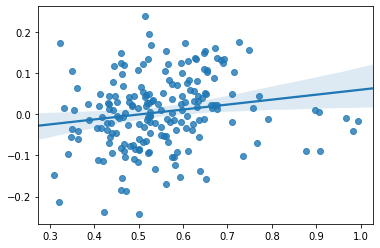

In [94]:
## Test for Homoscedasticity

sns.regplot(y_pred,resid)

The data is Heteroscedasticity which mean it fails Homoscedasticity due to the datapoint spread out from the regression line 

In [95]:
regressor.coef_

array([ 8.26747418e-03, -4.70748672e-02,  4.43815769e-06,  8.50951223e-04])

coefficients:  tier = 8.26747418e-03, type =  -4.70748672e-02, tuition = 4.43815769-e06, sat = 8.50951223e-04 

In [96]:
regressor.intercept_

-0.4046096931633911

Y intercept = -0.4046096931633911

grad_rate = 8.26747418e-03 * tier - 4.70748672e-02 * type + 4.43815769e-06 * tuition + 8.50951223e-04 * sat

In [97]:
regressor.score(X,y)

0.7266549498130273

Score near 1 which mean as sort of good mode

In [98]:
# get 95% confidence interal

confidence=0.95

In [99]:
a = 1.0 * np.array(scoreboard_reorder)

In [100]:
n = len(a)

In [101]:
m, se = np.mean(a), scipy.stats.sem(a)

In [102]:
h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

In [103]:
h

array([8.58131649e-02, 3.07432279e-02, 8.14483081e+02, 8.87022321e+00,
       1.06938416e-02])

In [104]:
m

4790.924494077022

In [105]:
m-h, m+h

(array([4790.83868091, 4790.89375085, 3976.44141291, 4782.05427087,
        4790.91380024]),
 array([4791.01030724, 4790.9552373 , 5605.40757524, 4799.79471728,
        4790.93518792]))

lower limit m-h, upper limit m+h

In [106]:
scoreboard_reorder.head(3)

,tier,type,sticker_price_2013,sat_avg_2013,grad_rate_150_p_2013
1,6,2,29450.0,1075.0,0.565611
4,5,1,8014.0,984.0,0.261176
5,6,2,32340.0,1115.0,0.625142


In [107]:
# Rename the columns

scoreboard_reorder.rename(columns = {'tier':'Tier','type':'Type',
                          'sticker_price_2013':'Tuition','sat_avg_2013':'SAT','grad_rate_150_p_2013':'Graduation'},
                          inplace = True)

In [108]:
scoreboard_reorder.head(3)

,Tier,Type,Tuition,SAT,Graduation
1,6,2,29450.0,1075.0,0.565611
4,5,1,8014.0,984.0,0.261176
5,6,2,32340.0,1115.0,0.625142


In [109]:
import seaborn as sns

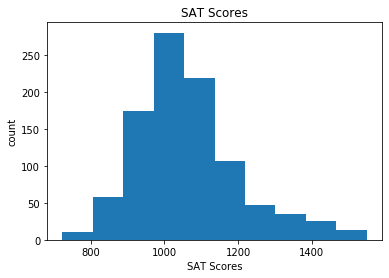

In [110]:
fig, ax = plt.subplots()
ax.hist(scoreboard_reorder.SAT)
ax.set_ylabel('count')
ax.set_xlabel('SAT Scores')
ax.set_title('SAT Scores')
plt.show()

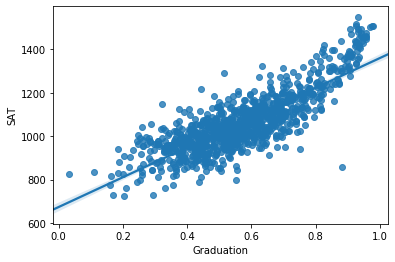

In [111]:
sns.regplot(scoreboard_reorder.Graduation,scoreboard_reorder.SAT,scoreboard_reorder)

SAT score is normal

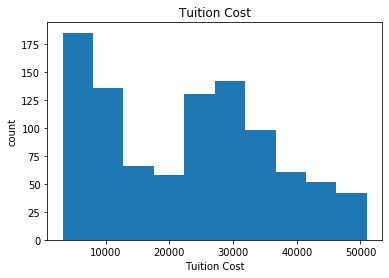

In [112]:
fig, ax = plt.subplots()
ax.hist(scoreboard_reorder.Tuition)
ax.set_ylabel('count')
ax.set_xlabel('Tuition Cost')
ax.set_title('Tuition Cost')
plt.show()

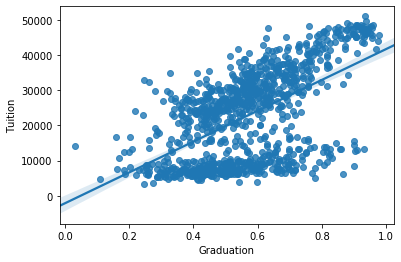

In [113]:
sns.regplot(scoreboard_reorder.Graduation,scoreboard_reorder.Tuition,scoreboard_reorder)

Tuition is not normal

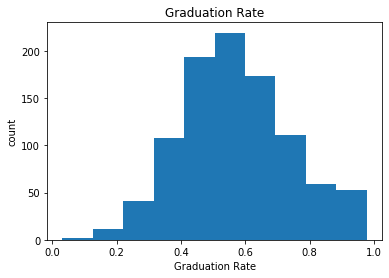

In [114]:
fig, ax = plt.subplots()
ax.hist(scoreboard_reorder.Graduation)
ax.set_ylabel('count')
ax.set_xlabel('Graduation Rate')
ax.set_title('Graduation Rate')
plt.show()

Graduation is normal

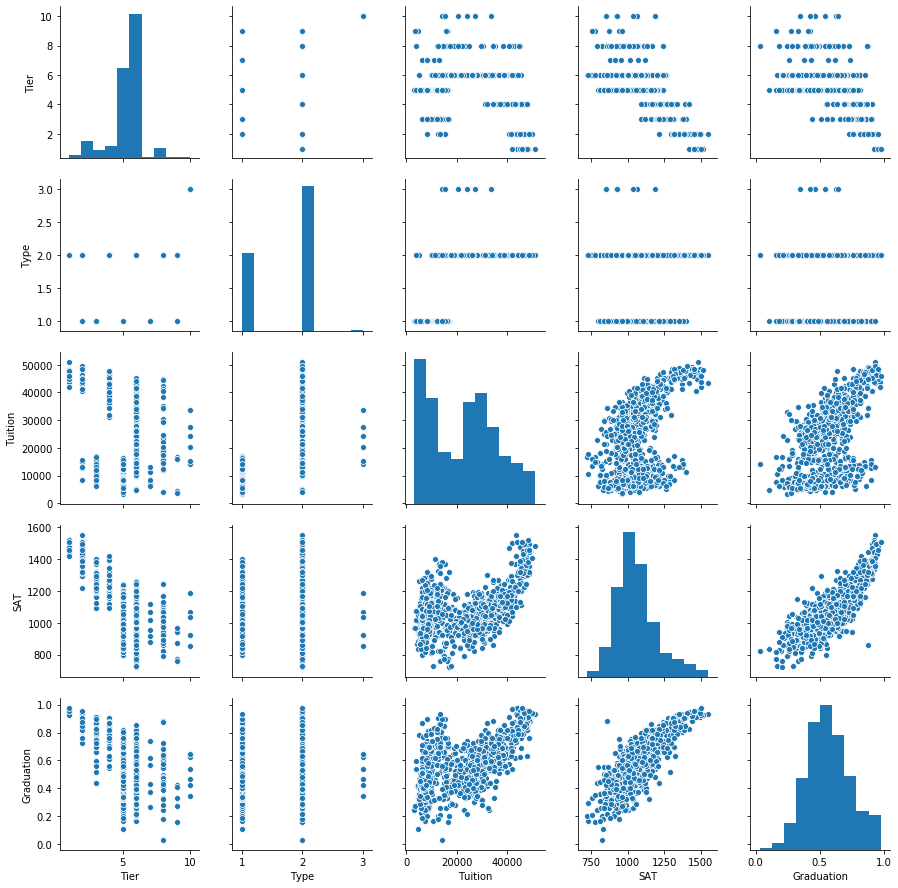

In [115]:
sns.pairplot(scoreboard_reorder)